** Data Set Summary :** The dataset contains information on various cars about their different technical aspects and specifications such as their make, number of doors, horsepower, engine size, city and highway mpg etc. 

** Data Source : ** https://archive.ics.uci.edu/ml/datasets/Automobile

** Goal :** The goal of this project is to ***predict the prices of cars*** based on the available specifications.

In [199]:
# Importing all the necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
col_names = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
cars = pd.read_csv(r'C:\Users\duttaroym\Documents\Python\imports-85.data', names=col_names)

#### Exploring the Data

In [201]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [202]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


While inspecting, it appears that the dataset has missing values and those are indicated with '?' mark. 

The dataset is not showing any null values because all the missing value is filled with '?' .

#### Cleaning and Transforming the Data

In [203]:
# Counting missing values
cars['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
104     6
128     6
134     6
102     5
168     5
65      5
95      5
94      5
85      5
74      5
103     5
122     4
118     4
93      4
106     4
148     4
83      3
154     3
137     3
115     3
125     3
101     3
145     2
197     2
108     2
81      2
113     2
158     2
194     2
119     2
153     2
87      2
110     2
188     2
89      2
129     2
164     2
192     2
256     1
90      1
121     1
142     1
186     1
107     1
231     1
98      1
77      1
78      1
Name: normalized-losses, dtype: int64

Inquiring the range of missing values in 'normalized-losses' column, we can find that there are 41 missing values which are marked with  '?'. Its 20% of the whole dataset. 
So it will not be a good idea to drop such a big amount of data. 

But, the column ***'normalized-losses'*** represents the average loss payment per insured vehicle. 

So, it is unlikely to be a strong predictor of the price of the vehicle. Price can be a predictor of loss of payment but the other-way is not true. 

So we can drop this whole column from our dataset. 

In [204]:
cars.drop('normalized-losses',axis = 1, inplace = True)

In [205]:
# Replacing the '?'
cars.replace("?", np.nan, inplace=True)

In [206]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-nul

It appears that the new dataframe consists maximum 11 missing values in various columns. Since it is very small number, these observation can be deleted without having any impact on the data. 

In [207]:
# Droppping NaN values
cars.dropna(axis = 0, how = 'any', inplace = 'True')

In [217]:
# Correcting the Datatypes of variables
cars[['price','peak-rpm','horsepower']] = cars[['price','peak-rpm','horsepower']].astype(int)
cars[['stroke','bore',]] = cars[['stroke','bore',]].astype(float)

#### Modelling the Data & Evaluation

In [209]:
# Importing the necessary SciKit-Learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [215]:
def knn_train_test(df, col, kval):
    #temprmse =[]
    X = df[[col]]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    for k in kval:
        knn = KNeighborsRegressor(k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** (1/2)
        print("RMSE of {} for k = {} : {}".format(col,k, rmse))
        plt.xlim([0,10])
        plt.ylim([0,10000])
        plt.xticks([1,3,5,7,9])
        plt.bar(k,rmse)
        #temprmse.append(rmse)
        #if len(temprmse) == 5:
            #plt.xlim([0,10])
            #plt.ylim([0,10000])
            #plt.xticks([1,3,5,7,9])
            #plt.bar(kval,temprmse)
            #temprmse = []
                 
    plt.show()      
          
    

In [211]:
features = ['highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'engine-size', 'curb-weight', 
            'width', 'length', 'height', 'wheel-base','bore', 'stroke']

RMSE of highway-mpg for k = 1 : 6199.4940426308485
RMSE of highway-mpg for k = 3 : 4712.874023184214
RMSE of highway-mpg for k = 5 : 3675.688369648498
RMSE of highway-mpg for k = 7 : 3568.432049879912
RMSE of highway-mpg for k = 9 : 3533.4711932646196


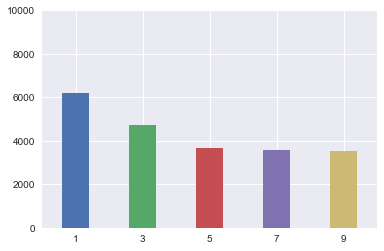

RMSE of city-mpg for k = 1 : 3781.3034382746505
RMSE of city-mpg for k = 3 : 4025.80794389643
RMSE of city-mpg for k = 5 : 4826.534517563379
RMSE of city-mpg for k = 7 : 4871.731171839743
RMSE of city-mpg for k = 9 : 5246.978906006387


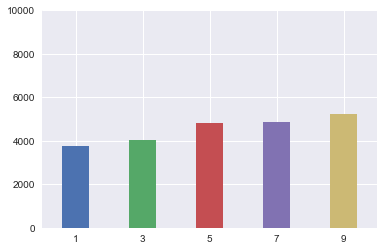

RMSE of peak-rpm for k = 1 : 7696.915732608211
RMSE of peak-rpm for k = 3 : 5326.160308292423
RMSE of peak-rpm for k = 5 : 5829.783270809935
RMSE of peak-rpm for k = 7 : 6697.856027432003
RMSE of peak-rpm for k = 9 : 6860.316418306878


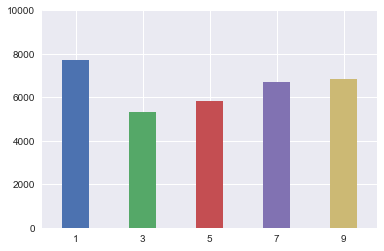

RMSE of horsepower for k = 1 : 2844.8766094642706
RMSE of horsepower for k = 3 : 3131.9569048968497
RMSE of horsepower for k = 5 : 3357.2259226010715
RMSE of horsepower for k = 7 : 3420.1601014147363
RMSE of horsepower for k = 9 : 3439.573086827268


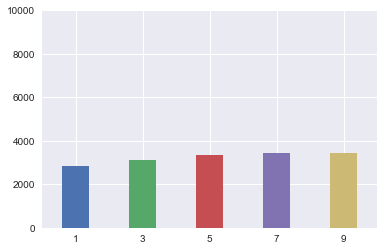

RMSE of engine-size for k = 1 : 3171.1138785558032
RMSE of engine-size for k = 3 : 2494.0497668082403
RMSE of engine-size for k = 5 : 2776.131936937085
RMSE of engine-size for k = 7 : 2812.73829113212
RMSE of engine-size for k = 9 : 3068.1268906235605


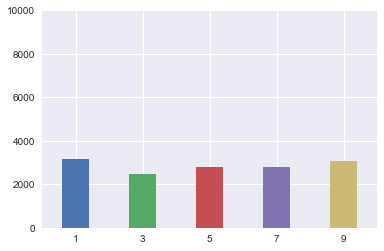

RMSE of curb-weight for k = 1 : 6348.812713554785
RMSE of curb-weight for k = 3 : 6146.613811256515
RMSE of curb-weight for k = 5 : 5959.795624356809
RMSE of curb-weight for k = 7 : 5365.251857606693
RMSE of curb-weight for k = 9 : 5677.467924317633


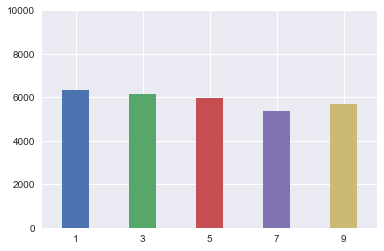

RMSE of width for k = 1 : 3511.656486909174
RMSE of width for k = 3 : 4708.579859214272
RMSE of width for k = 5 : 4785.42716952957
RMSE of width for k = 7 : 4556.976095218343
RMSE of width for k = 9 : 4187.861728221318


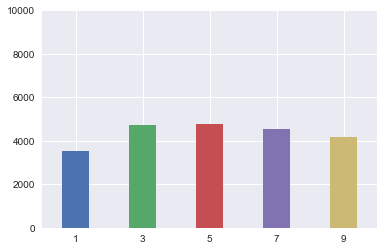

RMSE of length for k = 1 : 5503.838215515069
RMSE of length for k = 3 : 5382.267455539808
RMSE of length for k = 5 : 5046.792487541735
RMSE of length for k = 7 : 5270.513080811758
RMSE of length for k = 9 : 5411.793950521365


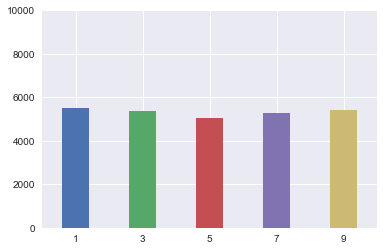

RMSE of height for k = 1 : 6913.185578743988
RMSE of height for k = 3 : 6260.569774184766
RMSE of height for k = 5 : 6178.118119331343
RMSE of height for k = 7 : 6195.8439785040955
RMSE of height for k = 9 : 6437.83130780609


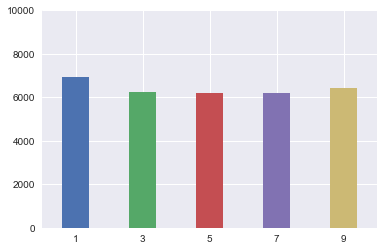

RMSE of wheel-base for k = 1 : 3559.449935896535
RMSE of wheel-base for k = 3 : 6778.922787128214
RMSE of wheel-base for k = 5 : 6594.8611614242145
RMSE of wheel-base for k = 7 : 6384.8377658465215
RMSE of wheel-base for k = 9 : 6132.014446871287


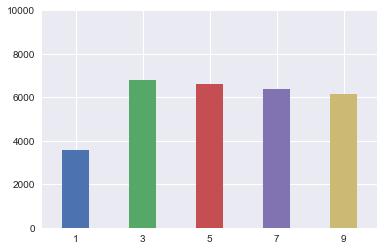

RMSE of bore for k = 1 : 8758.778237010469
RMSE of bore for k = 3 : 7725.510826654995
RMSE of bore for k = 5 : 7308.149910395962
RMSE of bore for k = 7 : 7378.806750677301
RMSE of bore for k = 9 : 7718.0385982278785


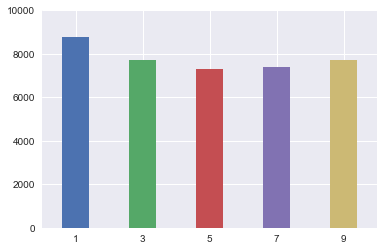

RMSE of stroke for k = 1 : 10396.549230270393
RMSE of stroke for k = 3 : 9984.527823465156
RMSE of stroke for k = 5 : 7948.55850940508
RMSE of stroke for k = 7 : 7743.907230842538
RMSE of stroke for k = 9 : 7780.679659937189


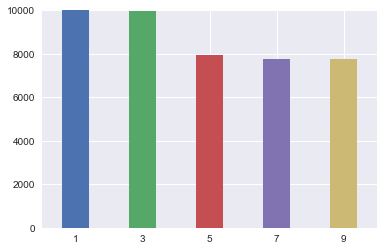

In [216]:
for i in features:
    knn_train_test(cars, i, [1, 3, 5, 7, 9])

From the graphs, we can see for **engine-size** and **horsepower**, the errors are lower than other variables. So I take these 2 variable to create the KNearestNeighbours model for deciding the price of the car

In [265]:
two_var = ['engine-size', 'horsepower']
three_var = ['engine-size', 'horsepower','width' ] # For 3 variables
four_var = ['engine-size', 'horsepower', 'width', 'highway-mpg'] # For 4 variables
five_var = ['engine-size', 'horsepower', 'width', 'highway-mpg','city-mpg'] # for 5 variables

In [266]:
def knn_train_test1(df, col, k):
    X = df[col]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** (1/2)
    print("RMSE of {} for k = {} : {}".format(col,k, rmse))
        

In [328]:
knn_train_test1(cars,two_var, 3)
knn_train_test1(cars, three_var, 3)
knn_train_test1(cars, four_var, 3)
knn_train_test1(cars, five_var, 3)

RMSE of ['engine-size', 'horsepower'] for k = 3 : 2064.614970692593
RMSE of ['engine-size', 'horsepower', 'width'] for k = 3 : 3961.6899797594588
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 3 : 2350.9298330175825
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg', 'city-mpg'] for k = 3 : 2759.591707691989


In [283]:
kval = np.arange(1,26,1)

In [323]:
def knn_train_test2(df, col, kval):
    X = df[col]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    for k in kval:
        knn = KNeighborsRegressor(k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** (1/2)
        print("RMSE of {} for k = {} : {}".format(col,k, rmse))
        plt.xlim([0,25])
        plt.ylim([0,7000])
        plt.xticks(kval)
        plt.xlabel("K value")
        plt.ylabel("RMSE")
        plt.title("Error graph for each K value")
        plt.bar(k,rmse)
    plt.show()
    

RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 1 : 1431.0267337895937
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 2 : 1676.6427497402094
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 3 : 1758.7455756873985
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 4 : 2175.7824137949747
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 5 : 2143.5432437785616
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 6 : 2515.2395413046547
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 7 : 2690.036183832788
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 8 : 2772.2494237329765
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 9 : 2841.0935877397037
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 10 : 2920.52270220633
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 11

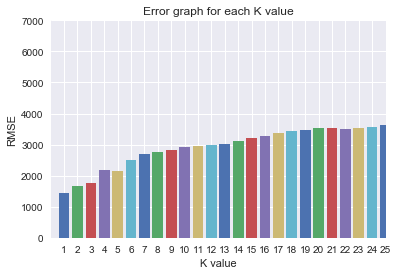

In [326]:
knn_train_test2(cars, four_var, kval)

#### Conclusion

From the graph, we see that the error is higher when k value goes beyind 10. RMSE is in the lower range when k < 10. 
Based on this observation, I choose k=4 and these four variables (engine-size, horsepower, width and highway-mpg) for an 
optimal model for deciding the price of the cars.